# Retrieving names of Communes in the canton of Vaud, Switzerland

## Commune names

In [384]:
import pandas as pd

Communes=pd.read_html('https://fr.wikipedia.org/wiki/Communes_du_canton_de_Vaud',header=0)[0]
Communes.columns=['Commune', 'OFS', 'District', 'Pop', 'Ar', 'Den']
Communes.drop([313],inplace=True)

list1 =[]
list2 =[]
list3 =[]
for index in Communes.index:
    list1.append(int(Communes.loc[index,'Pop'][:-1].replace('\xa0','')))
    list2.append(float(Communes.loc[index,'Ar'].replace(',','.')))
    list3.append(int(Communes.loc[index,'Den'].replace('\xa0','')))
    
Communes['Population']=list1
Communes['Area']=list2
Communes['Density']=list3

Communes.drop(['Pop','Ar','Den'],axis=1,inplace=True)

Communes=Communes[['OFS','Commune','District','Population','Area','Density']]
print(Communes.shape)
Communes.head(15)

(313, 6)


,OFS,Commune,District,Population,Area,Density
0,5621,Aclens,Morges,535,3.90,137
1,5742,Agiez,Jura-Nord vaudois,327,5.47,60
2,5401,Aigle,Aigle,10134,16.41,618
3,5851,Allaman,Morges,434,2.60,167
4,5421,Apples,Morges,1469,12.93,114
5,5701,Arnex-sur-Nyon,Nyon,235,2.04,115
6,5743,Arnex-sur-Orbe,Jura-Nord vaudois,631,7.61,83
7,5702,Arzier-Le Muids,Nyon,2697,51.91,52
8,5511,Assens,Gros-de-Vaud,1077,5.35,201
9,5422,Aubonne,Morges,3242,6.87,472


## Commune geolocation

In [ ]:
import geopy as gp
import numpy as np

locator = gp.Nominatim(user_agent="myGeocoder")

latitudes=[]
longitudes=[]

for index in Communes.index:
    
    try:
        location=locator.geocode(Communes.loc[index,'Commune'] +", Vaud, Switzerland")
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
        
    except:
        
        try:
            location=locator.geocode(Communes.loc[index,'Commune'] +", Switzerland")
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
            
        except:
            
            try:
                location=locator.geocode(Communes.loc[index,'Commune'] + ", " + Communes.loc[index, 'District'] +", Switzerland")
                latitudes.append(location.latitude)
                longitudes.append(location.longitude)
            except:
                latitudes.append(np.NaN)
                longitudes.append(np.NaN)

In [ ]:
Communes['Latitude']=latitudes
Communes['Longitude']=longitudes
Communes.head(303)

In [ ]:
print(Communes[Communes['Latitude'].isna()].count())
Communes[Communes['Latitude'].isna()]

In [386]:
Communes.dropna(inplace=True)
Communes.reset_index(inplace=True, drop=True)
Communes.drop(Communes[Communes['Commune']=='Fey'].index,inplace=True)
print(Communes.shape)
Communes.head(30)

(308, 9)


,Unnamed: 0,OFS,Commune,District,Population,Area,Density,Latitude,Longitude
0,0,5621,Aclens,Morges,535,3.90,137,46.568029,6.510760
1,1,5742,Agiez,Jura-Nord vaudois,327,5.47,60,46.719902,6.508106
2,2,5401,Aigle,Aigle,10134,16.41,618,46.317901,6.968893
3,3,5851,Allaman,Morges,434,2.60,167,46.470778,6.396174
4,4,5421,Apples,Morges,1469,12.93,114,46.551673,6.426766
5,5,5701,Arnex-sur-Nyon,Nyon,235,2.04,115,46.375991,6.191382
6,6,5743,Arnex-sur-Orbe,Jura-Nord vaudois,631,7.61,83,46.688307,6.515295
7,7,5702,Arzier-Le Muids,Nyon,2697,51.91,52,46.459981,6.208069
8,8,5511,Assens,Gros-de-Vaud,1077,5.35,201,46.612787,6.622594
9,9,5422,Aubonne,Morges,3242,6.87,472,46.495292,6.391575


In [99]:
import requests

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium
from pandas.io.json import json_normalize 

CLIENT_ID = 'OTR01OD0QISMCRRKL5ONN0NHERZV323GGXHUSXCWCGN0WKFK' # your Foursquare ID
CLIENT_SECRET = 'PTST2DMHE5FBW0C3FL5040LWGSPVHV04FMBELLJ4U2M5DOB2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [387]:
latitude=46.5613
longitude=6.5368
map_Vaud = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label,den in zip(Communes['Latitude'], Communes['Longitude'], Communes['Commune'],Communes['Density']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=max(1,np.log(den)),
        popup=label,
        color='red',
        opacity=0.5,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.1,
        parse_html=False).add_to(map_Vaud)  
    
map_Vaud

# Querying restaurant data for each commune

In [ ]:
LIMIT = 200 # limit of number of venues returned by Foursquare API

def getNearbyRestaurants(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Restaurants3 = getNearbyRestaurants(names=Communes['Commune'],
                                   latitudes=Communes['Latitude'],
                                   longitudes=Communes['Longitude'])

In [108]:
Restaurants3=Restaurants3.drop(Restaurants3[Restaurants3['Venue Category']=='Restaurant'].index.values).reset_index(drop=True)
Restaurants3=Restaurants3.drop(Restaurants3[Restaurants3['Venue Category']=='Food'].index.values).reset_index(drop=True)
Restaurants3.drop_duplicates(subset=['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category' ], inplace=True)
Restaurants3.replace(['Pizza Place'], 'Italian Restaurant',inplace=True)
Restaurants3.replace(['Chinese Restaurant', 'Indian Restaurant', 'Thai Restaurant', 'Sushi Place', 'Japanese Restaurant', 'Indonesian Restaurant'], 'Asian Restaurant',inplace=True)

print(Restaurants3.shape)
Total=Restaurants3['Neighborhood'].value_counts().to_frame()
Total.reset_index(inplace=True)
Total.columns=['Commune', 'Total']

#Communes.join(Total,on='Commune')
MergeCommune=Communes.join(Total.set_index('Commune'),on='Commune')
MergeCommune.fillna(0,inplace=True)
MergeCommune['Total']=MergeCommune['Total'].astype(int)

MergeCommune.sort_values('Population',ascending=False).head(15)

(819, 8)


,Unnamed: 0,OFS,Commune,District,Population,Area,Density,Latitude,Longitude,Total
152,153,5586,Lausanne,Lausanne,139720,41.38,3377,46.521827,6.632702,93
305,306,5938,Yverdon-les-Bains,Jura-Nord vaudois,30211,11.28,2678,46.778571,6.640916,15
191,192,5886,Montreux,Riviera-Pays-d'Enhaut,26006,33.37,779,46.431083,6.912992,38
199,200,5724,Nyon,Nyon,21239,6.79,3128,46.382058,6.240279,23
232,233,5591,Renens,Ouest lausannois,20968,2.96,7084,46.534909,6.592844,0
284,285,5890,Vevey,Riviera-Pays-d'Enhaut,19904,2.38,8363,46.460298,6.841865,0
230,231,5590,Pully,Lavaux-Oron,18336,5.85,3134,46.509802,6.661748,5
193,194,5642,Morges,Morges,15725,3.85,4084,46.509327,6.498317,9
129,130,5721,Gland,Nyon,13101,8.32,1575,46.421291,6.267584,11
106,106,5635,Écublens,Ouest lausannois,12939,5.71,2266,46.526167,6.562074,1


In [73]:
yhat

array([  3.64757331,   1.69856845,   4.43210252,   1.49819323,
         1.52775679,   1.44125601,   1.34490071,   1.50585786,
         4.65328172,   1.44454085,   1.39964804,   2.1666581 ,
         1.881972  ,   1.80039848,   5.51938444,   1.43632875,
         1.56826981,  11.31110423,   2.09822394,   1.41223993,
        15.51022426,   1.78835407,   1.40567025,   4.00781073,
         1.379939  ,   1.56607992,   2.9840357 ,   2.24439931,
         1.81956004,   3.39190329,   1.88635178,   2.84935728,
         1.4905286 ,   1.83707919,   1.38924605,   3.42913147,
         1.86226296,   3.08531826,   1.40293288,  12.7520539 ,
         2.88275315,   1.94438395,   1.50366796,   3.31580451,
         3.11214445,   1.86226296,   1.48669629,   1.70513813,
         2.6829254 ,   1.53651636,   1.881972  ,   1.30493516,
         1.72484717,   1.40129046,   1.39088847,   8.35639096,
         3.92514226,   4.21092331,   1.46972462,   1.48286398,
         1.59673842,   1.48669629,   2.74916967,   6.06

[ 0.00057813]
1.09632905468
0.870769898279


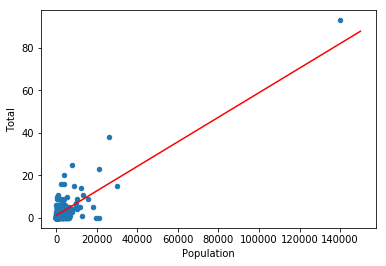

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

model=LinearRegression()

X=MergeCommune[['Population']]
y=MergeCommune['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model.fit(X_train,y_train)
yhat=model.predict(X_test)

print(model.coef_)
print(model.intercept_)
print(r2_score(yhat,(y_test.values).astype(float)))

fig=plt.figure()
ax=MergeCommune.plot.scatter(x='Population',y='Total')
plt.plot([0,150000],[model.intercept_,model.intercept_+150000*model.coef_],color='r')
plt.savefig('Total_Population')
plt.show()

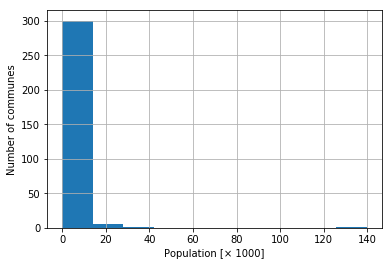

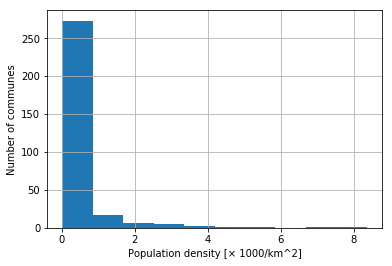

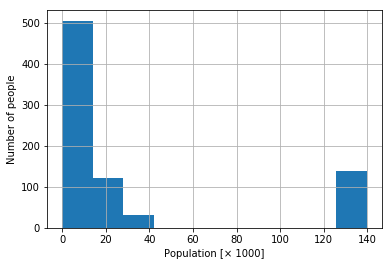

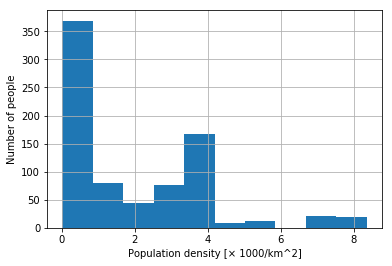

In [20]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


fig1=plt.figure(1)
ax=plt.hist(MergeCommune['Population'].values/1000)
plt.xlabel("Population [× 1000]")
plt.ylabel("Number of communes")
plt.grid(True)
plt.show()
fig1.savefig('communepop.png')

fig2=plt.figure(2)
ax=plt.hist(MergeCommune['Density'].values/1000)
plt.xlabel("Population density [× 1000/km^2]")
plt.ylabel("Number of communes")
plt.grid(True)
plt.show()
fig2.savefig('communeden')

fig3=plt.figure(3)
ax=plt.hist(MergeCommune['Population'].values/1000,weights=MergeCommune['Population'].values/1000)
plt.xlabel("Population [× 1000]")
plt.ylabel("Number of people")
plt.grid(True)
plt.show()
fig3.savefig('peoplepop')

fig4=plt.figure(4)
ax=plt.hist(MergeCommune['Density'].values/1000,weights=MergeCommune['Population'].values/1000)
plt.xlabel("Population density [× 1000/km^2]")
plt.ylabel("Number of people")
plt.grid(True)
plt.show()
fig4.savefig('peopleden')


In [107]:
import numpy as np

latitude=46.5613
longitude=6.5368
map_Vaud = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label,tot in zip(MergeCommune['Latitude'], MergeCommune['Longitude'], MergeCommune['Commune'],MergeCommune['Total']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=max(1,2*np.log(tot+1)),
        popup=label,
        color='red',
        opacity=0,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1.,
        parse_html=False).add_to(map_Vaud)  
    
fig=plt.figure()
display(map_Vaud)
fig.savefig('Fig3')

In [122]:
temp=Restaurants3['Venue Category'].value_counts().to_frame()
temp.columns=['Restaurant category counts']
temp.transpose().iloc[:,:13]

,Swiss Restaurant,Italian Restaurant,French Restaurant,Asian Restaurant,Diner,Bakery,Café,Burger Joint,Fast Food Restaurant,Seafood Restaurant,Snack Place,Steakhouse,Bistro
Restaurant category counts,127,126,84,76,71,70,63,19,18,11,10,9,9


In [124]:
temp=Restaurants3['Venue'].value_counts().to_frame()
temp.columns=['Restaurant name counts']
temp.transpose().iloc[:,:13]

,McDonald's,Fleur de Pains,Max Poulet,Holy Cow!,Buffet de la Gare,Burger King,Café de la Poste,Auberge Communale,Café-Restaurant de la Poste,Auberge De La Couronne,Rando Burger,Migros Take Away,Molino
Restaurant name counts,13,6,4,4,3,3,3,2,2,2,2,2,2


In [441]:
Restaurants3.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Aclens,46.568029,6.510760,Centrale De Distribution COOP,46.565708,6.523242,Snack Place
1,2,Aclens,46.568029,6.510760,La Pause,46.561356,6.521865,Diner
2,3,Aclens,46.568029,6.510760,Restaurant Du Moulin,46.562374,6.524105,Diner
3,4,Agiez,46.719902,6.508106,Le Normand,46.719919,6.507214,Diner
4,6,Agiez,46.719902,6.508106,La Charrue,46.722407,6.532079,Italian Restaurant


In [129]:
MergeDistrict=MergeCommune.groupby('District').sum().reset_index()
MergeDistrict['Latitude']=MergeCommune.groupby('District').mean()['Latitude'].values
MergeDistrict['Longitude']=MergeCommune.groupby('District').mean()['Longitude'].values
MergeDistrict['Density']=MergeDistrict['Population']/MergeDistrict['Area']
MergeDistrict.drop(['OFS','Unnamed: 0'],axis=1,inplace=True)
MergeDistrict

,District,Population,Area,Density,Latitude,Longitude,Total
0,Aigle,45551,435.01,104.712535,46.330350,6.987976,55
1,Broye-Vully,43155,257.04,167.892157,46.746211,6.870335,53
2,Gros-de-Vaud,44530,224.82,198.069567,46.638631,6.628256,44
3,Jura-Nord vaudois,92073,698.98,131.724799,46.764527,6.590528,87
4,Lausanne,166980,65.17,2562.221881,46.554172,6.625141,113
5,Lavaux-Oron,60697,132.37,458.540455,46.539097,6.759793,72
6,Morges,82632,370.53,223.010283,46.559034,6.454437,111
7,Nyon,100727,307.35,327.727347,46.417296,6.236219,134
8,Ouest lausannois,76336,26.35,2897.001898,46.538472,6.573020,58
9,Riviera-Pays-d'Enhaut,85060,282.90,300.671615,46.465964,6.931335,92


In [443]:
latitude=46.5613
longitude=6.5368
map_Vaud = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label,tot in zip(MergeDistrict['Latitude'], MergeDistrict['Longitude'], MergeDistrict['District'],MergeDistrict['Total']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=max(1,2*np.log(tot+1)),
        popup=label,
        color='red',
        opacity=0,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1.,
        parse_html=False).add_to(map_Vaud)  
    
map_Vaud

In [130]:
Rest_filt=Restaurants3[['Neighborhood', 'Venue Category']]
for index in Rest_filt.index:
    Rest_filt.loc[index,'District']=Communes[Communes['Commune']==Rest_filt.loc[index,'Neighborhood']]['District'].values[0]
    
Rest_filt.drop(['Neighborhood'],inplace=True,axis=1)
Rest_filt.head()

/Users/Pierre-Olivier/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Pierre-Olivier/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/Pierre-Olivier/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,Venue Category,District
0,Snack Place,Morges
1,Diner,Morges
2,Diner,Morges
3,Diner,Jura-Nord vaudois
4,Italian Restaurant,Jura-Nord vaudois


In [131]:
for name in MergeDistrict['District']:
    print(name+'\n-------')
    print(Rest_filt.groupby('District').get_group(name)['Venue Category'].value_counts())
    print('\n')

Aigle
-------
Swiss Restaurant        12
Italian Restaurant       9
Asian Restaurant         7
Diner                    6
Bakery                   4
Fast Food Restaurant     2
French Restaurant        2
Café                     2
Burger Joint             2
Falafel Restaurant       1
Burrito Place            1
American Restaurant      1
Buffet                   1
Cafeteria                1
Food Truck               1
Snack Place              1
Bistro                   1
Gastropub                1
Name: Venue Category, dtype: int64


Broye-Vully
-------
Swiss Restaurant              15
Diner                         11
Italian Restaurant             7
Bakery                         6
French Restaurant              2
Portuguese Restaurant          2
South American Restaurant      1
Modern European Restaurant     1
Spanish Restaurant             1
Fast Food Restaurant           1
BBQ Joint                      1
Falafel Restaurant             1
Asian Restaurant               1
Snack Place   

In [132]:
# one hot encoding
onehot = pd.get_dummies(Rest_filt[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['District'] = Rest_filt['District'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onethot = onehot[fixed_columns]

Rest_grouped = onehot.groupby('District').mean().reset_index()
print(Rest_grouped.shape)
Rest_grouped

(10, 57)


,District,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,...,South American Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Aigle,0.018182,0.000000,0.127273,0.000000,0.000000,0.072727,0.00000,0.018182,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.218182,0.000000,0.00000,0.000000,0.000000,0.000000
1,Broye-Vully,0.000000,0.000000,0.018868,0.000000,0.018868,0.113208,0.00000,0.000000,0.000000,...,0.018868,0.018868,0.000000,0.000000,0.283019,0.000000,0.00000,0.000000,0.000000,0.000000
2,Gros-de-Vaud,0.000000,0.000000,0.113636,0.022727,0.000000,0.113636,0.00000,0.022727,0.000000,...,0.000000,0.000000,0.022727,0.000000,0.250000,0.000000,0.00000,0.000000,0.000000,0.000000
3,Jura-Nord vaudois,0.000000,0.011494,0.045977,0.000000,0.022989,0.091954,0.00000,0.034483,0.011494,...,0.000000,0.000000,0.000000,0.000000,0.183908,0.011494,0.00000,0.000000,0.000000,0.000000
4,Lausanne,0.000000,0.000000,0.159292,0.000000,0.000000,0.053097,0.00000,0.017699,0.000000,...,0.000000,0.000000,0.008850,0.017699,0.070796,0.008850,0.00000,0.000000,0.017699,0.008850
5,Lavaux-Oron,0.000000,0.000000,0.069444,0.000000,0.013889,0.138889,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.013889,0.263889,0.000000,0.00000,0.013889,0.000000,0.000000
6,Morges,0.000000,0.009009,0.108108,0.000000,0.000000,0.081081,0.00000,0.018018,0.000000,...,0.000000,0.000000,0.000000,0.009009,0.072072,0.018018,0.00000,0.000000,0.000000,0.000000
7,Nyon,0.000000,0.000000,0.067164,0.000000,0.000000,0.074627,0.00000,0.000000,0.000000,...,0.000000,0.007463,0.037313,0.014925,0.194030,0.007463,0.00000,0.000000,0.000000,0.007463
8,Ouest lausannois,0.000000,0.000000,0.086207,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,...,0.000000,0.017241,0.034483,0.017241,0.034483,0.000000,0.00000,0.000000,0.017241,0.000000
9,Riviera-Pays-d'Enhaut,0.010870,0.000000,0.108696,0.000000,0.000000,0.065217,0.01087,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010870,0.108696,0.000000,0.01087,0.000000,0.000000,0.010870


In [133]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 8

indicators = ['st', 'nd', 'rd','th','th']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common'.format(ind+1))
    

# create a new dataframe
Rest_ranked = pd.DataFrame(columns=columns)
Rest_ranked['District'] = Rest_grouped['District']

for ind in np.arange(Rest_grouped.shape[0]):
    Rest_ranked.iloc[ind, 1:] = return_most_common_venues(Rest_grouped.iloc[ind, :], num_top_venues)

Rest_ranked.set_index('District')

,1st Most Common,2nd Most Common,3rd Most Common,4th Most Common,5th Most Common,6th Most Common,7th Most Common,8th Most Common
District,,,,,,,,
Aigle,Swiss Restaurant,Italian Restaurant,Asian Restaurant,Diner,Bakery,Burger Joint,Fast Food Restaurant,Café
Broye-Vully,Swiss Restaurant,Diner,Italian Restaurant,Bakery,Portuguese Restaurant,French Restaurant,Modern European Restaurant,Gastropub
Gros-de-Vaud,Swiss Restaurant,French Restaurant,Asian Restaurant,Bakery,Diner,Italian Restaurant,Food Truck,Bistro
Jura-Nord vaudois,Swiss Restaurant,Diner,Italian Restaurant,Café,Bakery,French Restaurant,Asian Restaurant,Bistro
Lausanne,Italian Restaurant,Asian Restaurant,French Restaurant,Café,Swiss Restaurant,Burger Joint,Bakery,Diner
Lavaux-Oron,Swiss Restaurant,Italian Restaurant,Bakery,Diner,French Restaurant,Asian Restaurant,Burger Joint,Food Truck
Morges,French Restaurant,Italian Restaurant,Asian Restaurant,Bakery,Swiss Restaurant,Diner,Café,Cafeteria
Nyon,Swiss Restaurant,French Restaurant,Italian Restaurant,Café,Bakery,Asian Restaurant,Diner,Steakhouse
Ouest lausannois,Italian Restaurant,Café,Bakery,Asian Restaurant,Fast Food Restaurant,Diner,Burger Joint,Kebab Restaurant


# Clustering districts
## 1. K-means

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

kclusters = 3

Rest_grouped_clustering = Rest_grouped.drop('District', 1)

# run k-means clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init=1000).fit(Rest_grouped_clustering)

kmeans.labels_=(kmeans.labels_-kmeans.labels_[0])%kclusters

# add clustering labels
Rest_ranked['Cluster Labels']=kmeans.labels_
Rest_ranked.set_index('District')

,1st Most Common,2nd Most Common,3rd Most Common,4th Most Common,5th Most Common,6th Most Common,7th Most Common,8th Most Common,Cluster Labels
District,,,,,,,,,
Aigle,Swiss Restaurant,Italian Restaurant,Asian Restaurant,Diner,Bakery,Burger Joint,Fast Food Restaurant,Café,0
Broye-Vully,Swiss Restaurant,Diner,Italian Restaurant,Bakery,Portuguese Restaurant,French Restaurant,Modern European Restaurant,Gastropub,0
Gros-de-Vaud,Swiss Restaurant,French Restaurant,Asian Restaurant,Bakery,Diner,Italian Restaurant,Food Truck,Bistro,2
Jura-Nord vaudois,Swiss Restaurant,Diner,Italian Restaurant,Café,Bakery,French Restaurant,Asian Restaurant,Bistro,0
Lausanne,Italian Restaurant,Asian Restaurant,French Restaurant,Café,Swiss Restaurant,Burger Joint,Bakery,Diner,1
Lavaux-Oron,Swiss Restaurant,Italian Restaurant,Bakery,Diner,French Restaurant,Asian Restaurant,Burger Joint,Food Truck,0
Morges,French Restaurant,Italian Restaurant,Asian Restaurant,Bakery,Swiss Restaurant,Diner,Café,Cafeteria,1
Nyon,Swiss Restaurant,French Restaurant,Italian Restaurant,Café,Bakery,Asian Restaurant,Diner,Steakhouse,2
Ouest lausannois,Italian Restaurant,Café,Bakery,Asian Restaurant,Fast Food Restaurant,Diner,Burger Joint,Kebab Restaurant,1


['Asian Restaurant' 'Bakery' 'Bistro' 'Burger Joint' 'Cafeteria' 'Café'
 'Diner' 'Fast Food Restaurant' 'Food Truck' 'French Restaurant'
 'Gastropub' 'Italian Restaurant' 'Kebab Restaurant'
 'Modern European Restaurant' 'Portuguese Restaurant' 'Sandwich Place'
 'Steakhouse' 'Swiss Restaurant']


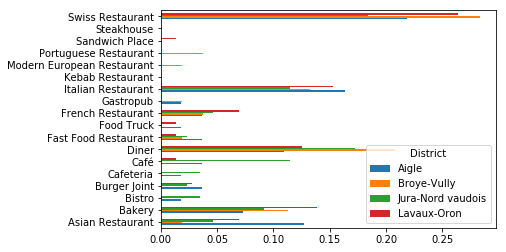

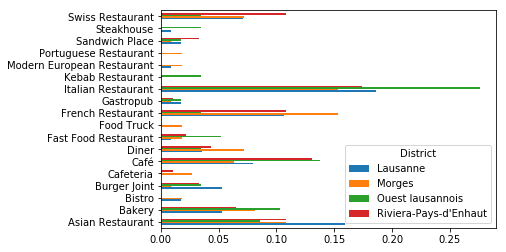

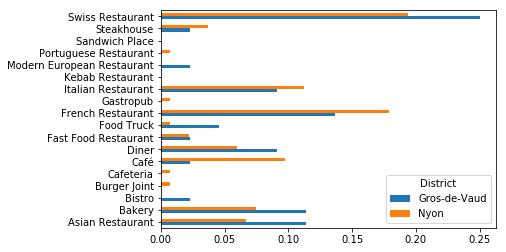

In [139]:
Best_types=np.unique(Rest_ranked.loc[:,'1st Most Common':'8th Most Common'].values.flatten())
print(Best_types)

for k in range(kclusters):
    plt.figure()
    temp=Rest_grouped.loc[Rest_ranked['Cluster Labels']==k,Best_types.flatten()]
    temp['District']=Rest_ranked['District']
    temp.set_index('District',inplace=True)
    temp.transpose()
    ax=temp.transpose().plot.barh()
    plt.show()

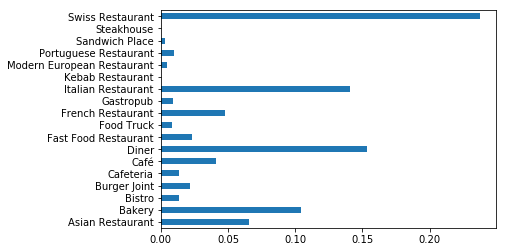

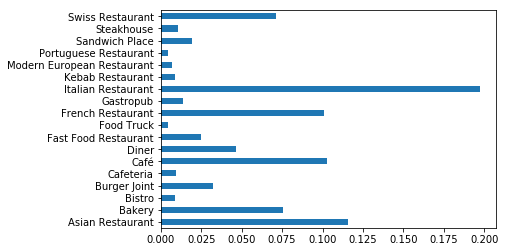

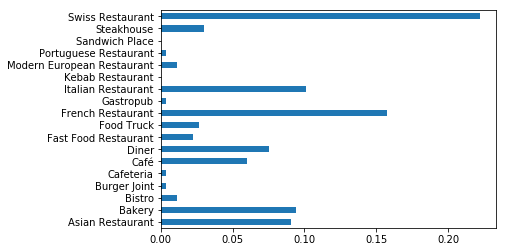

In [140]:
temp=Rest_grouped.loc[:,Best_types.flatten()].join(Rest_ranked[['Cluster Labels']]).groupby('Cluster Labels').mean()
temp.transpose()

for k in range(kclusters):
    plt.figure()
    ax=temp.transpose().iloc[:,k].plot.barh()
    plt.show()

In [141]:
latitude=46.5613
longitude=6.5368
map_Vaud = folium.Map(location=[latitude, longitude], zoom_start=10)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, label,tot,cluster in zip(MergeDistrict['Latitude'], MergeDistrict['Longitude'], MergeDistrict['District'],MergeDistrict['Total'],Rest_ranked['Cluster Labels']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=max(1,2*np.log(tot+1)),
        popup=label,
        color=rainbow[cluster-1],
        opacity=0,
        fill=True,
        fillcolor=rainbow[cluster-1],
        fill_opacity=1.,
        parse_html=False).add_to(map_Vaud)  
    
map_Vaud

## 2. Hierarchical clustering

/Users/Pierre-Olivier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


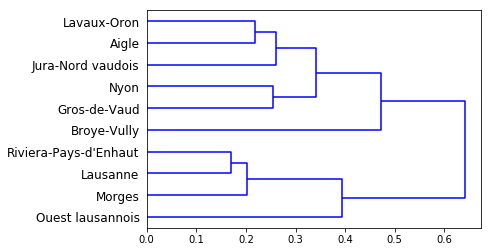

In [145]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(Rest_grouped_clustering,Rest_grouped_clustering) 
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z,labels=MergeDistrict['District'].values,orientation='right',color_threshold=0)

# Clustering communes
## 1. K-means

In [148]:
Rest_filt_com=Restaurants3[['Neighborhood', 'Venue Category']]
Rest_filt_com.columns=['Commune', 'Venue Category']
Rest_filt_com.head()

,Commune,Venue Category
0,Aclens,Snack Place
1,Aclens,Diner
2,Aclens,Diner
3,Agiez,Diner
4,Agiez,Italian Restaurant


In [149]:
# one hot encoding
onehot_com = pd.get_dummies(Rest_filt_com[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Commune'] = Rest_filt_com['Commune'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onethot = onehot[fixed_columns]

Rest_grouped_com = onehot.groupby('Commune').mean().reset_index()
print(Rest_grouped_com.shape)
Rest_grouped_com

(190, 57)


,Commune,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,...,South American Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Aclens,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Agiez,0.0,0.000000,0.200000,0.0,0.0,0.200000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Aigle,0.0,0.000000,0.222222,0.0,0.0,0.000000,0.0,0.111111,0.0,...,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0
3,Allaman,0.0,0.111111,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Apples,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Échallens,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
186,Échichens,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
187,Éclépens,0.0,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
188,Écublens,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [231]:
kclusters = 5

Rest_grouped_clustering_com = Rest_grouped_com.drop('Commune', 1)

# run k-means clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init=100).fit(Rest_grouped_clustering_com)

# add clustering labels
Rest_grouped_com['Cluster Labels']=kmeans.labels_


CommuneLabels=MergeCommune.join(Rest_grouped_com[['Commune','Cluster Labels']].set_index('Commune'),on='Commune',how='inner')

latitude=46.5613
longitude=6.5368
map_Vaud = folium.Map(location=[latitude, longitude], zoom_start=10)


x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, label,den,cluster in zip(CommuneLabels['Latitude'], CommuneLabels['Longitude'], CommuneLabels['Commune'],CommuneLabels['Density'],CommuneLabels['Cluster Labels']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.log(den),
        popup=label,
        color=rainbow[cluster-1],
        opacity=0,
        fill=True,
        #fillcolor=rainbow[cluster-1],
        fill_opacity=1.,
        parse_html=False).add_to(map_Vaud)  
    
map_Vaud

In [232]:
print(CommuneLabels.set_index('Commune').loc['Épalinges','Cluster Labels']) # red
print(CommuneLabels.set_index('Commune').loc['Cugy','Cluster Labels']) # green
print(CommuneLabels.set_index('Commune').loc['Ballens','Cluster Labels']) # violet

4
0
2


In [233]:
Rest_comp['Cluster Labels'].value_counts() 

1    98
0    36
3    34
2    22
Name: Cluster Labels, dtype: int64

In [234]:
Rest_comp=Rest_grouped_com.set_index('Commune').join(CommuneLabels.set_index('Commune')[['Density','Total']])
Rest_comp=Rest_comp[['Total','Density']+list(Best_types)+['Cluster Labels']]
Rest_comp.shape

(190, 21)

In [235]:
Rest_comp.iloc[:,:]

,Total,Density,Asian Restaurant,Bakery,Bistro,Burger Joint,Cafeteria,Café,Diner,Fast Food Restaurant,...,French Restaurant,Gastropub,Italian Restaurant,Kebab Restaurant,Modern European Restaurant,Portuguese Restaurant,Sandwich Place,Steakhouse,Swiss Restaurant,Cluster Labels
Commune,,,,,,,,,,,,,,,,,,,,,
Aclens,3,137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1
Agiez,5,60,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000,0.0,...,0.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.000000,4
Aigle,9,618,0.222222,0.000000,0.111111,0.000000,0.000000,0.111111,0.111111,0.0,...,0.000000,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.111111,4
Allaman,9,167,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,4
Apples,3,114,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Échallens,3,862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.666667,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,3
Échichens,7,229,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.142857,0.0,...,0.285714,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,4
Éclépens,4,208,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.250000,0.0,0.0,0.5,0.0,0.0,0.000000,4


## 2. Decision tree classifier

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Tree=DecisionTreeClassifier(criterion='entropy',max_depth=4)

X=Rest_comp.iloc[:,:-1].values
y=Rest_comp.iloc[:,-1].values

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)

Tree=Tree.fit(X_trainset,y_trainset)
predTree=Tree.predict(X_testset)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))


DecisionTrees's Accuracy:  0.973684210526


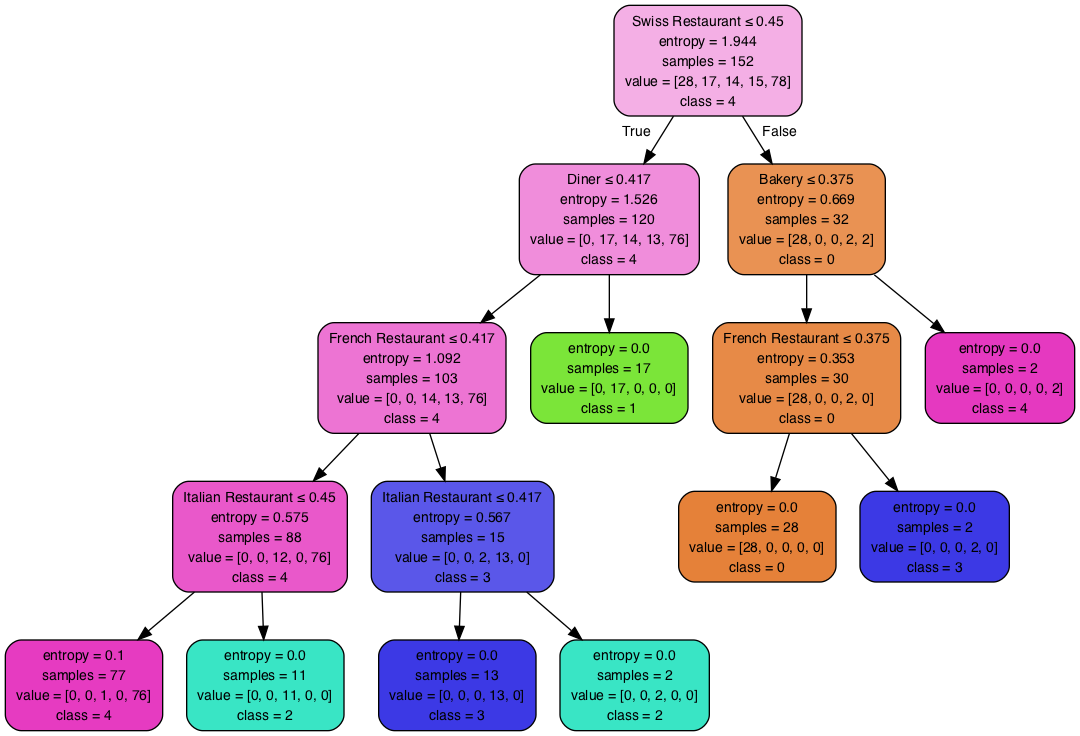

In [239]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(Tree, out_file=dot_data, feature_names=Rest_comp.columns[:-1].values, class_names=[str(i) for i in range(kclusters)],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 3. Average cluster properties

In [241]:
temp=Rest_comp.groupby('Cluster Labels').mean()
temp=temp.join(Rest_comp['Cluster Labels'].value_counts(),how='inner')
temp=temp.loc[:,['Total','Density','Cluster Labels']]
temp.columns=['Average restaurant number','Average population density','Total count']
temp.transpose()

,0,1,2,3,4
Average restaurant number,2.500000,1.681818,3.055556,1.777778,6.224490
Average population density,251.029412,112.318182,698.666667,245.111111,622.418367
Total count,34.000000,22.000000,18.000000,18.000000,98.000000


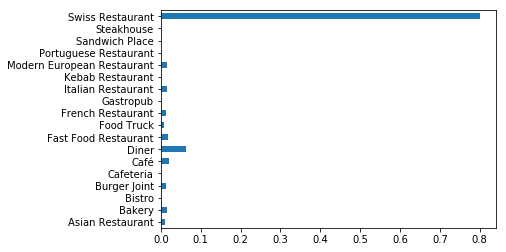

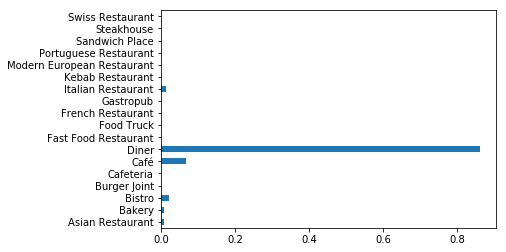

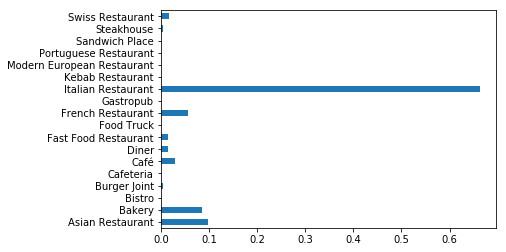

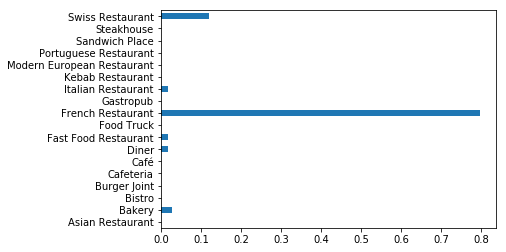

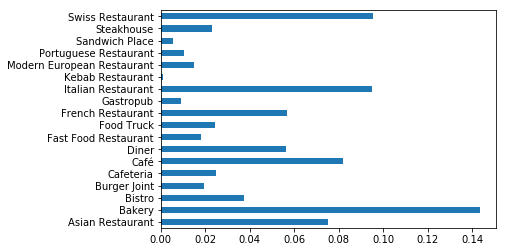

In [244]:
temp=Rest_comp.groupby('Cluster Labels').mean()
temp.transpose()

for k in range(kclusters):
    plt.figure()
    ax=temp.transpose().iloc[2:,k].plot.barh()
    plt.show()